In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データの読み込み
activity = pd.read_csv("data/dailyActivity_merged.csv")
sleep = pd.read_csv("data/sleepDay_merged.csv")
weight = pd.read_csv("data/weightLogInfo_merged.csv")

## データクリーニング

In [3]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [5]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [6]:
# 日付をdate型に変更
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"])
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])
weight["Date"] = pd.to_datetime(weight["Date"])

C:\Users\yuuki\AppData\Local\Temp\ipykernel_7460\4241759595.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])
C:\Users\yuuki\AppData\Local\Temp\ipykernel_7460\4241759595.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight["Date"] = pd.to_datetime(weight["Date"])


In [7]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
# 使いにくいのですべての日付のカラム名をdateにする
activity.rename(columns={"ActivityDate":"date"}, inplace=True)
sleep.rename(columns={"SleepDay":"date"}, inplace=True)
weight.rename(columns={"Date":"date"}, inplace=True)

In [9]:
# ユニーク値の確認
for col in activity.columns:
    print(col)
    print(activity[col].nunique())
    print("="*100)

Id
33
date
31
TotalSteps
842
TotalDistance
615
TrackerDistance
613
LoggedActivitiesDistance
19
VeryActiveDistance
333
ModeratelyActiveDistance
211
LightActiveDistance
491
SedentaryActiveDistance
9
VeryActiveMinutes
122
FairlyActiveMinutes
81
LightlyActiveMinutes
335
SedentaryMinutes
549
Calories
734


In [10]:
# ユニーク値の確認
for col in sleep.columns:
    print(col)
    print(sleep[col].nunique())
    print("="*100)

Id
24
date
31
TotalSleepRecords
3
TotalMinutesAsleep
256
TotalTimeInBed
242


In [11]:
# ユニーク値の確認
for col in weight.columns:
    print(col)
    print(weight[col].nunique())
    print("="*100)

Id
8
date
56
WeightKg
34
WeightPounds
34
Fat
2
BMI
36
IsManualReport
2
LogId
56


## weightとactivityのデータフレームとsleepとactivityのデータフレームを作成

In [12]:
# weightのidを確認
weight_id = weight["Id"].unique()
weight_id

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391], dtype=int64)

In [13]:
# sleepのidを確認
sleep_id = sleep["Id"].unique()
sleep_id

array([1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665], dtype=int64)

In [14]:
sleep_target_ids = [1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665]

In [15]:
# sleepにidがあるものだけactivityから抜き出す
sleep_activity =activity.loc[activity["Id"].isin(sleep_target_ids)]
sleep_activity

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
905,8792009665,2016-05-07,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
906,8792009665,2016-05-08,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
907,8792009665,2016-05-09,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688


In [16]:
# activityとsleep両方に存在するid同士でデータフレームを結合
sleep_df = pd.merge(sleep_activity, sleep, on=["Id", "date"])
sleep_df

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545


In [17]:
weight_target_ids = [1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391]


In [18]:
# weightにidがあるものだけactivityから抜き出す
weight_activity =activity.loc[activity["Id"].isin(weight_target_ids)]
weight_activity

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [19]:
# 時間付きの日付から日付だけにする
weight["date"] = weight["date"].dt.date
weight

,Id,date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [20]:
# weightのdateをデートタイム型に
weight["date"] = pd.to_datetime(weight["date"])
weight.dtypes

Id                         int64
date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [21]:
# activityとweightの両方に存在するid同士でデータフレームを結合
weight_df = pd.merge(weight_activity, weight, on=["Id", "date"])
weight_df

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,14727,9.710000,9.710000,0.0,3.21,0.57,5.92,0.00,...,15,277,798,2004,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,15103,9.660000,9.660000,0.0,3.73,1.05,4.88,0.00,...,24,254,816,1990,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,356,0.250000,0.250000,0.0,0.00,0.00,0.25,0.00,...,0,32,986,2151,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,8859,5.980000,5.980000,0.0,0.13,0.37,5.47,0.01,...,10,371,1057,1970,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,7566,5.110000,5.110000,0.0,0.00,0.00,5.11,0.00,...,0,268,720,1431,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,...,17,232,1095,4015,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,4,245,1174,2847,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,19,217,1131,3710,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,12,213,1127,3832,85.400002,188.274775,NaN,25.559999,False,1462949507000


### 集めたデータの期間中に個人がそれぞれの日に歩いた距離と睡眠時間

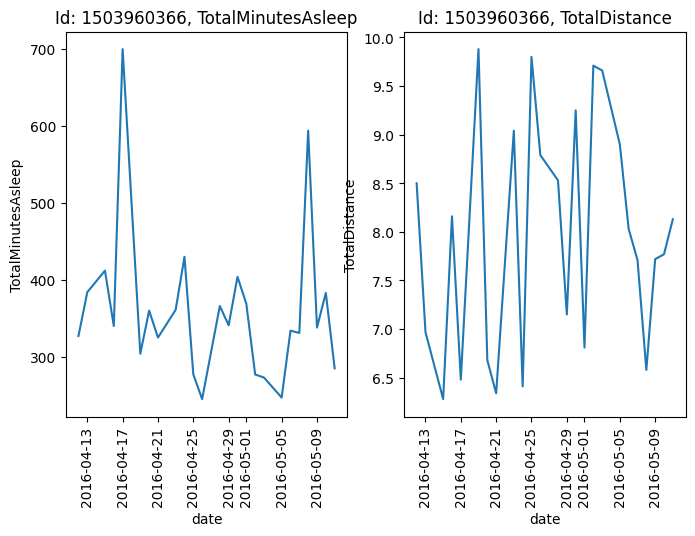

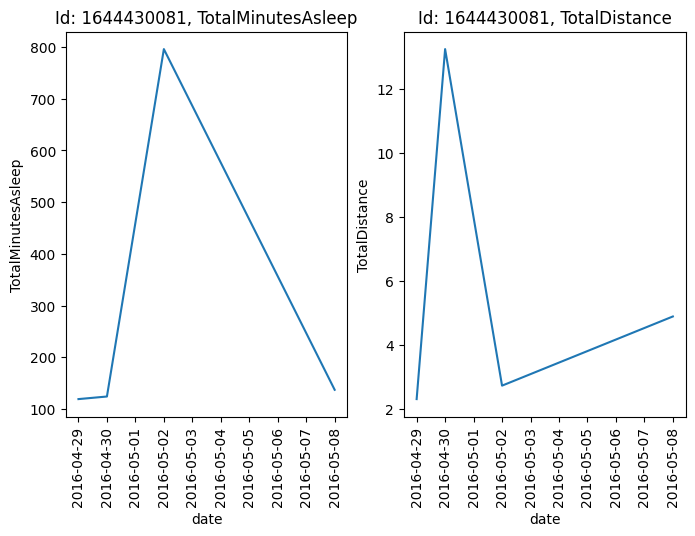

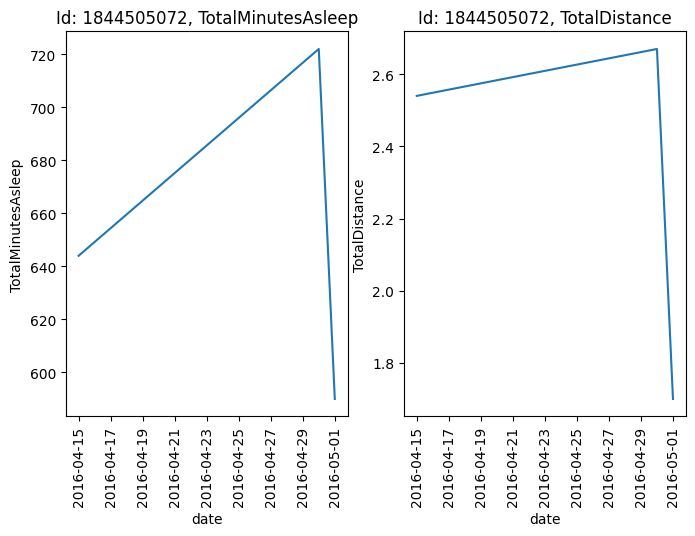

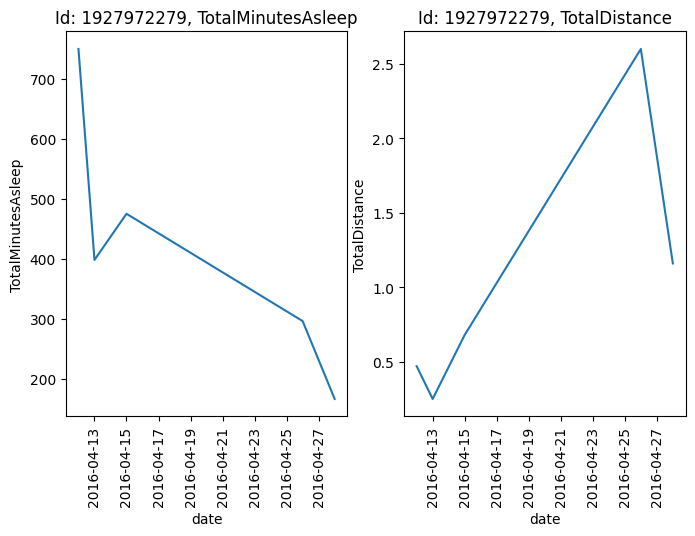

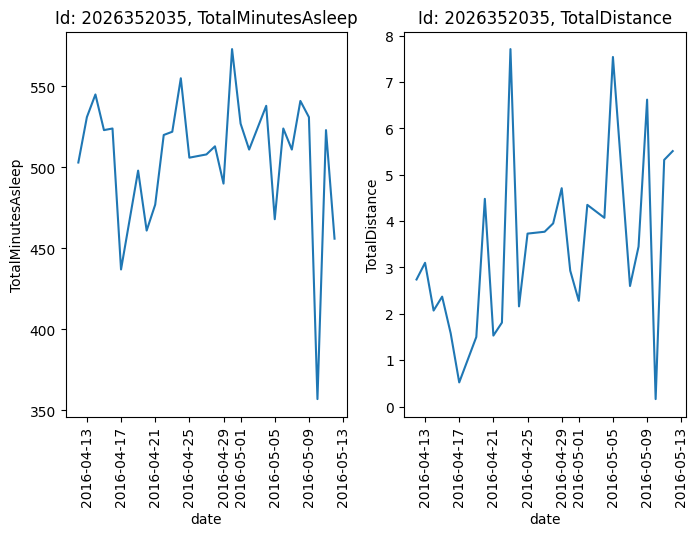

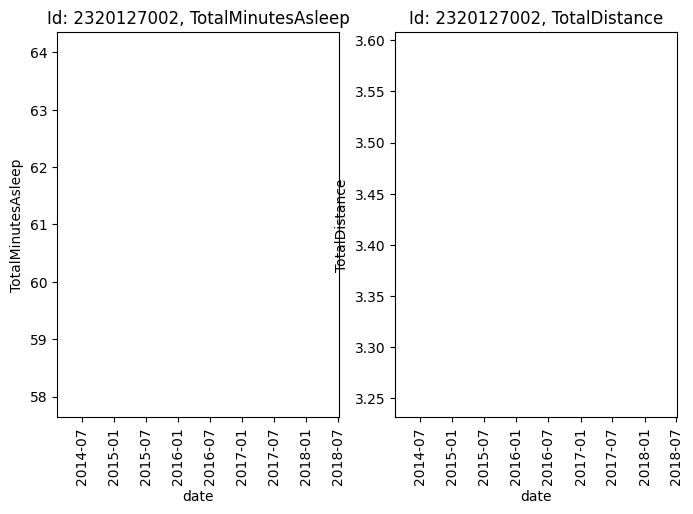

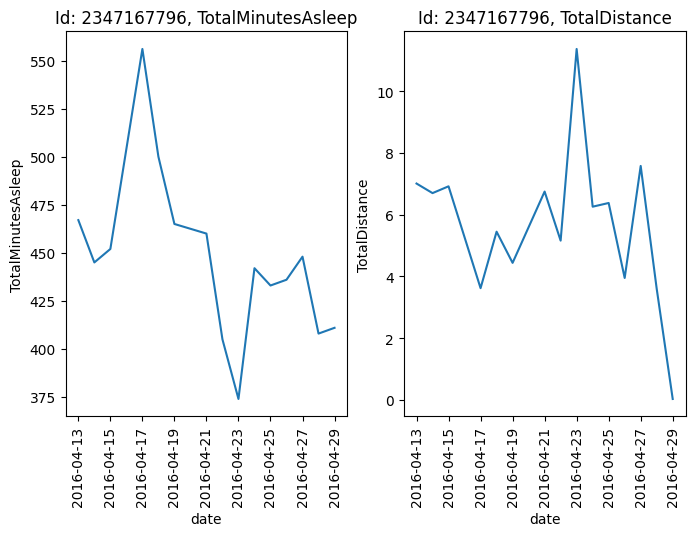

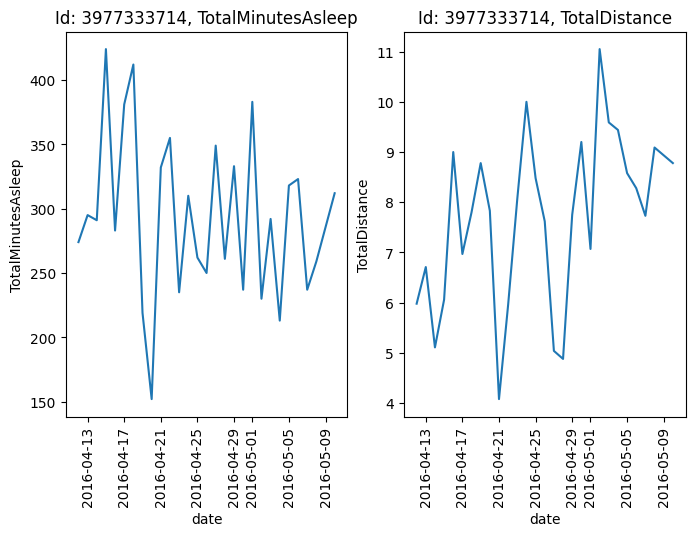

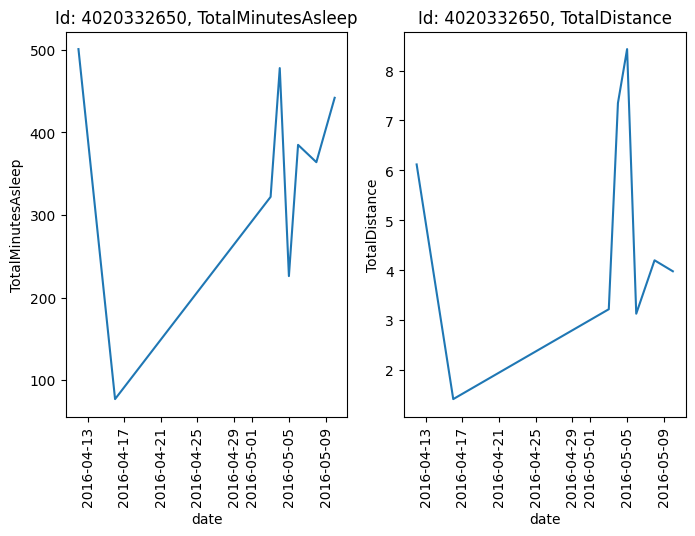

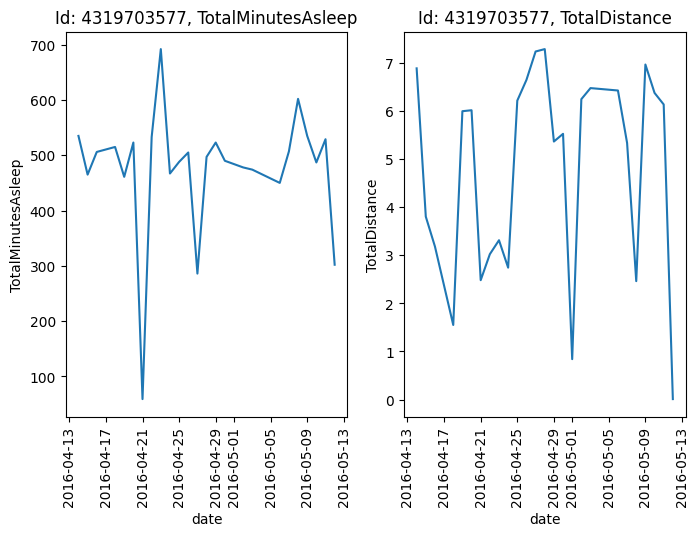

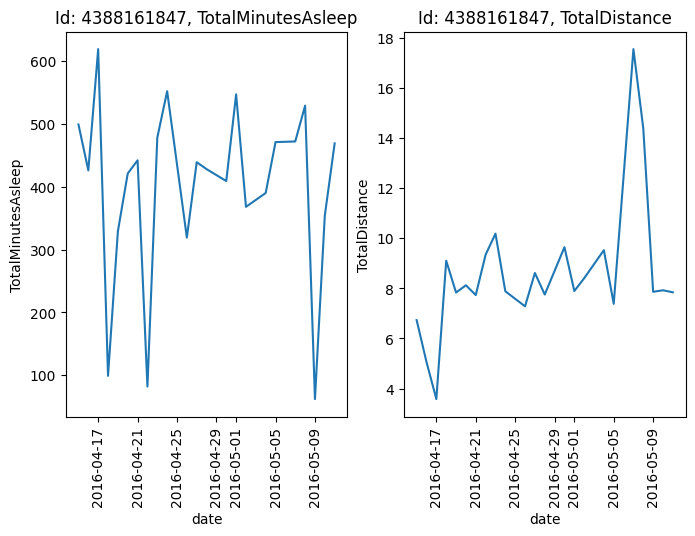

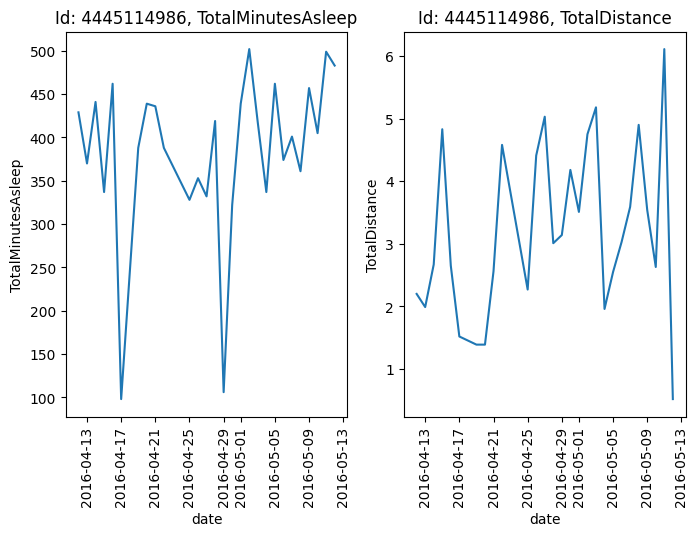

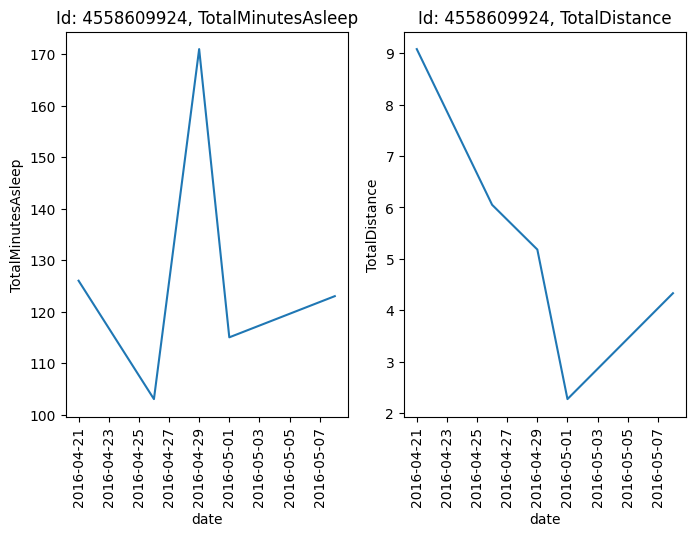

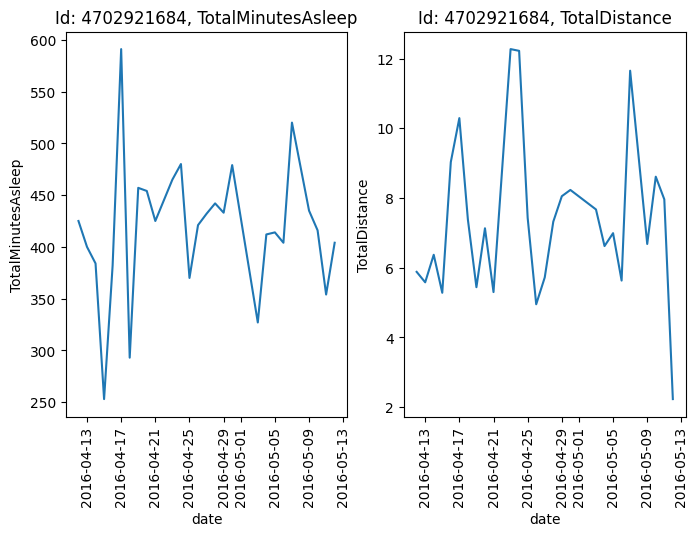

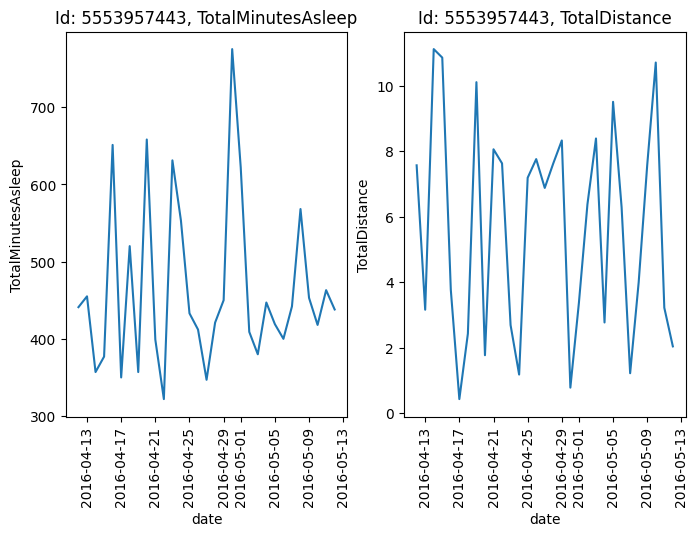

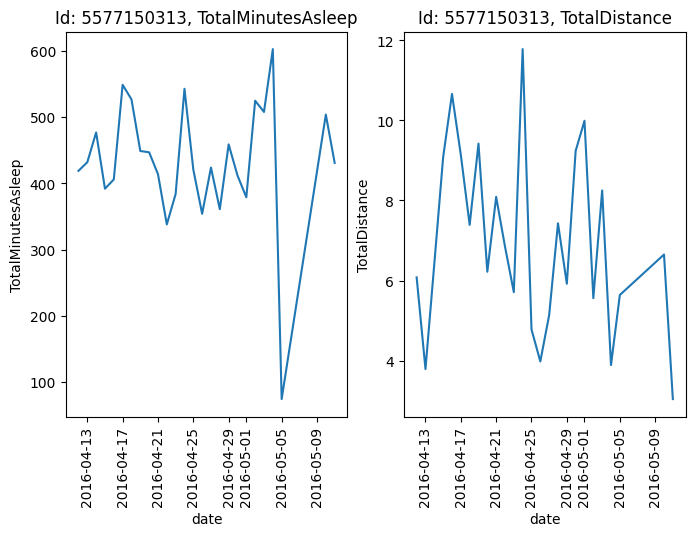

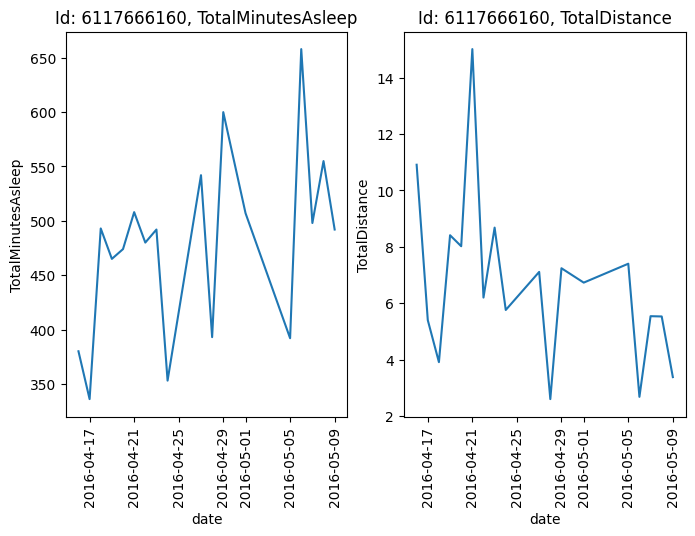

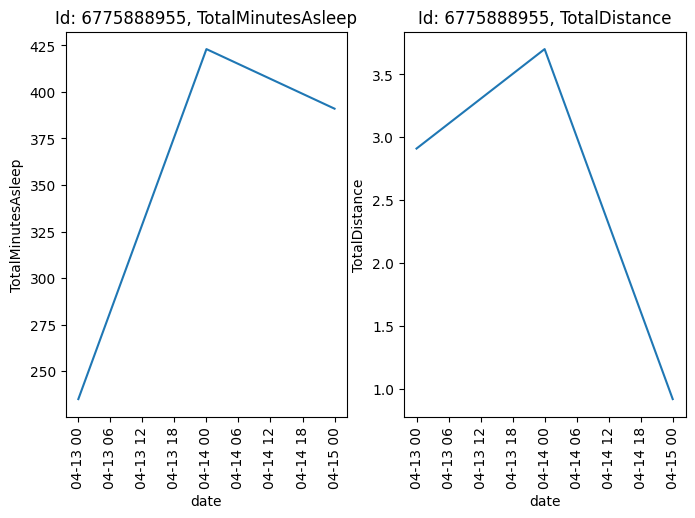

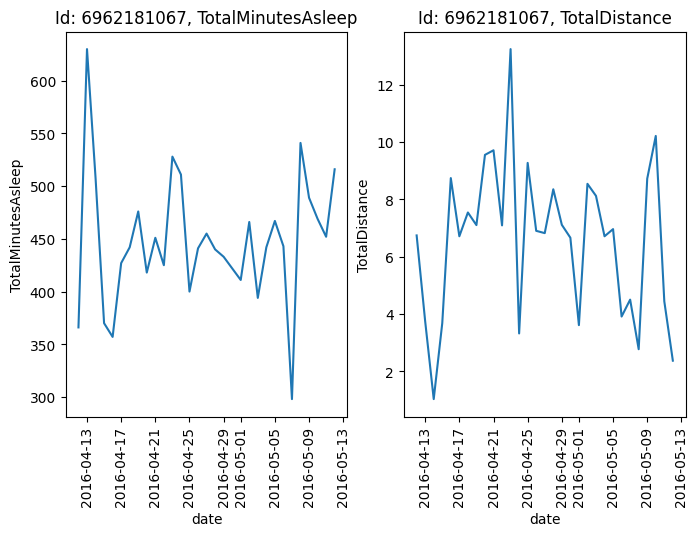

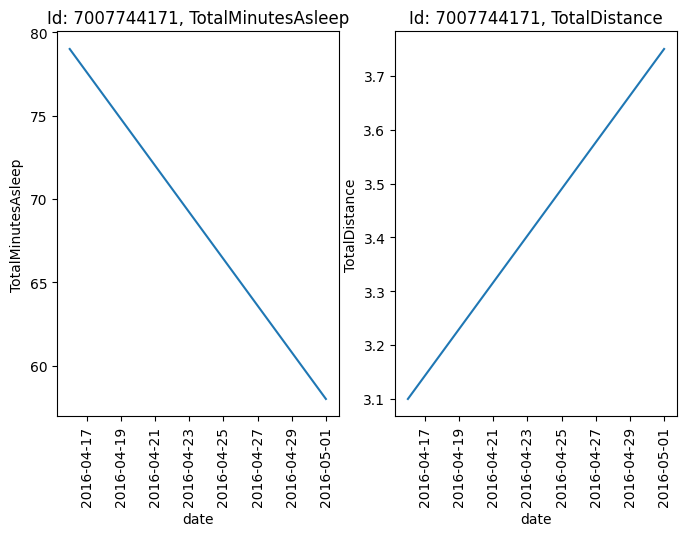

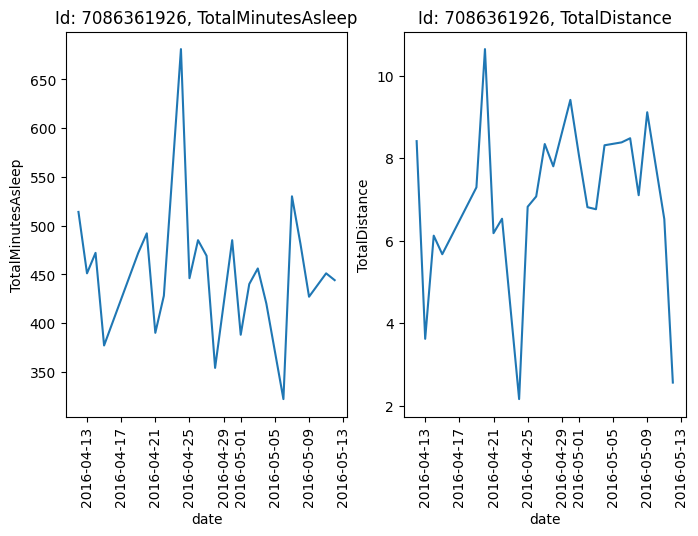

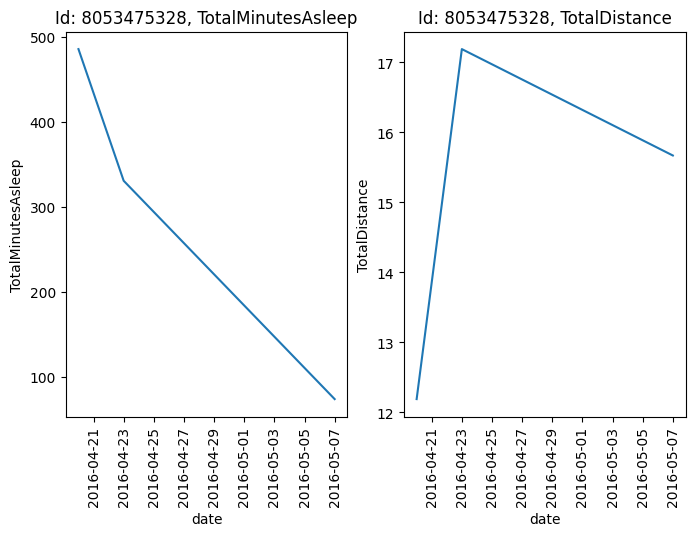

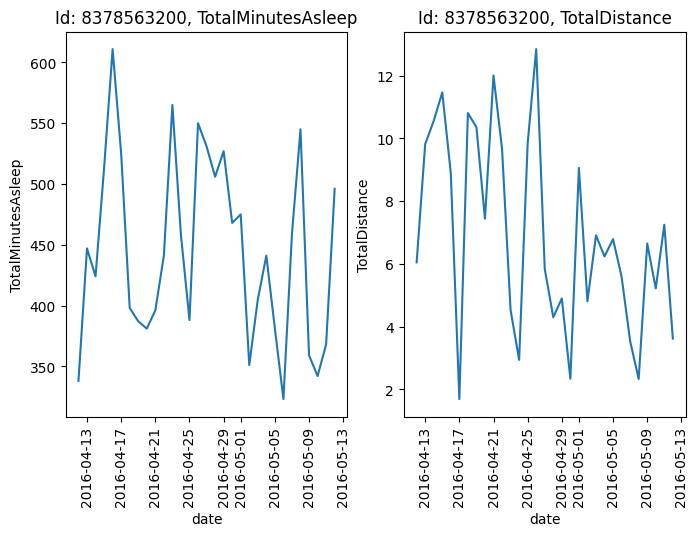

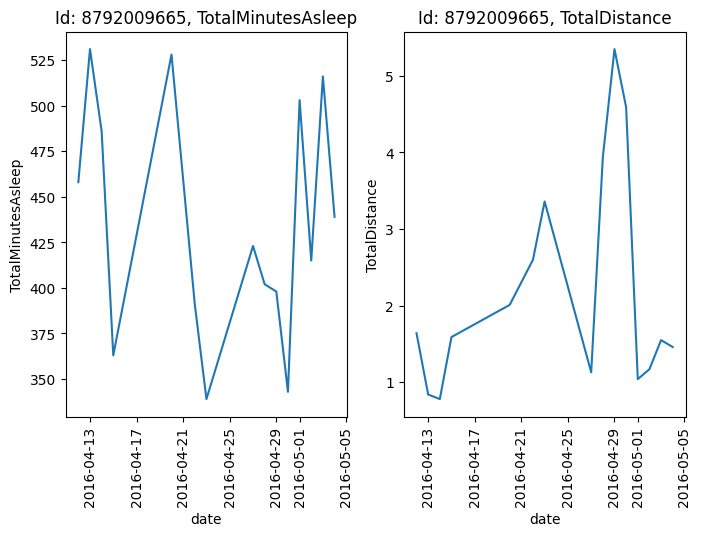

In [22]:
# 
for id in sleep_df["Id"].unique():
    id_df = sleep_df.loc[sleep_df["Id"] == id]
    figure, axes = plt.subplots(1, 2, figsize=(8, 5))
    sns.lineplot(data=id_df, x="date", y="TotalMinutesAsleep", ax=axes[0])
    sns.lineplot(data=id_df, x="date", y="TotalDistance", ax=axes[1])
    axes[0].set_title(f"Id: {id}, TotalMinutesAsleep")
    axes[1].set_title(f"Id: {id}, TotalDistance")
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)
    plt.show()

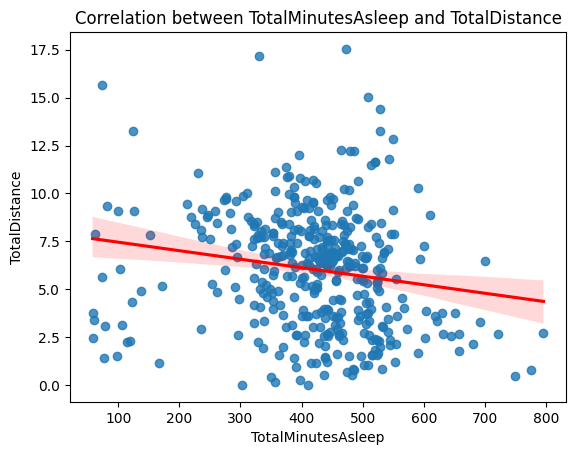

In [67]:
# 全てのユーザーを見てもsleep時間と歩いた距離に相関を確認
sns.regplot(data=sleep_df, x="TotalMinutesAsleep", y="TotalDistance", line_kws=dict(color="r"))
plt.title("Correlation between TotalMinutesAsleep and TotalDistance")
plt.savefig("./graph/correlation_between_sleep_and_distance.jpg")
# plt.show()

In [47]:
corr_sleep_distance = sleep_df["TotalMinutesAsleep"].corr(sleep_df["TotalDistance"])
print(f"睡眠と活動量の相関係数:{np.round(corr_sleep_distance, 3)}")

睡眠と活動量の相関係数:-0.172


## 歩く距離が大きいほど睡眠時間が短い
* スマートデバイスが適度な運動以上と判断する割合をactive_distance_rateとする  
* スマートデバイスが適度な運動以下と判断する割合をnegative_distance_rateとする  

In [24]:
# 適度な活動距離のうち適度な運動をしている距離の割合
sleep_df["active_distance_rate"] = (sleep_df["VeryActiveDistance"]+sleep_df["ModeratelyActiveDistance"])/sleep_df["TotalDistance"]
sleep_df["active_distance_rate"]

0      0.285882
1      0.324247
2      0.541401
3      0.382353
4      0.612654
         ...   
408    0.150327
409    0.000000
410    0.000000
411    0.000000
412    0.000000
Name: active_distance_rate, Length: 413, dtype: float64

In [25]:
# 活動距離のうち軽い運動しかしていない距離の割合
sleep_df["negative_distance_rate"]=(sleep_df["SedentaryActiveDistance"]+sleep_df["LightActiveDistance"])/sleep_df["TotalDistance"]
sleep_df["negative_distance_rate"]

0      0.712941
1      0.675753
2      0.450637
3      0.617647
4      0.387346
         ...   
408    0.851852
409    1.000000
410    1.000000
411    1.000000
412    1.000000
Name: negative_distance_rate, Length: 413, dtype: float64

##  Idごとのactive_distance_rateとnegative_distance_rateの可視化

c:\Users\yuuki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\yuuki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


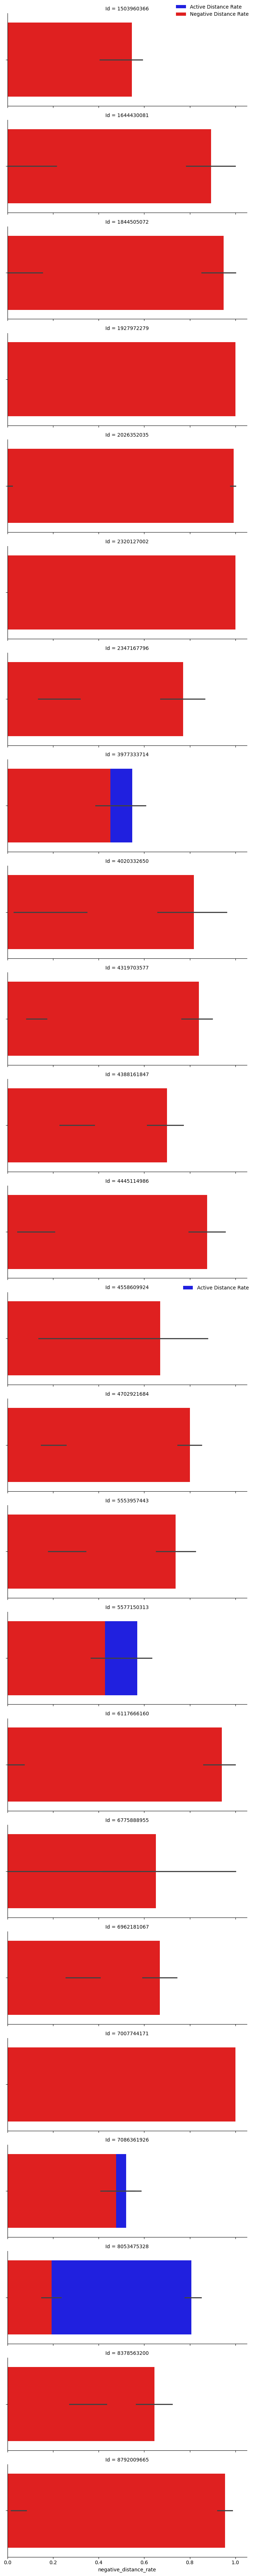

In [26]:

g = sns.FacetGrid(sleep_df, row="Id")
g.map(sns.barplot, "active_distance_rate", color="blue", label="Active Distance Rate")
g.add_legend()
g.map(sns.barplot, "negative_distance_rate", color="red", label="Negative Distance Rate")
g.add_legend(loc='upper right')
plt.tight_layout()
plt.show()

## 全体の平均値の可視化

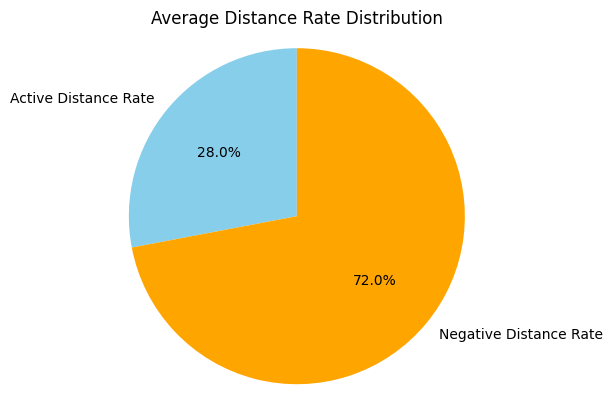

In [87]:
labels = ['Active Distance Rate', 'Negative Distance Rate']
sizes = [sleep_df['active_distance_rate'].mean(), sleep_df['negative_distance_rate'].mean()]
colors = ["skyblue", "orange"]
# 円グラフの作成
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # アスペクト比を保持して円形にする
plt.title('Average Distance Rate Distribution')

# 描画
plt.savefig("./graph/rate_active_distance.jpg")
# plt.show()

## 集めたデータの期間中に個人がそれぞれの日に歩いた距離と体重の関係

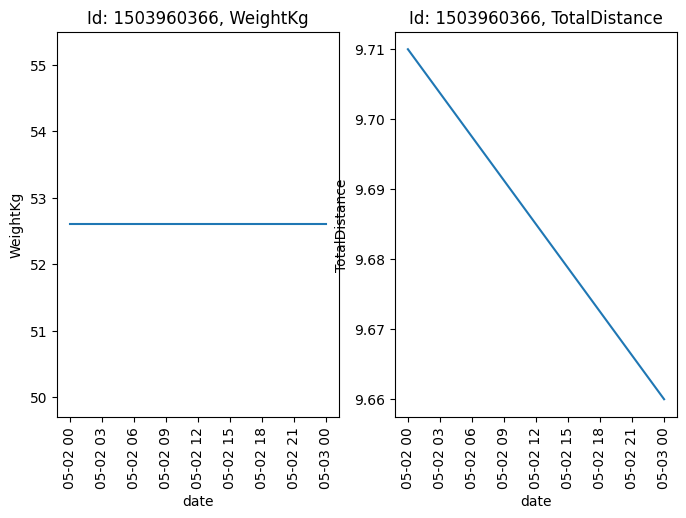

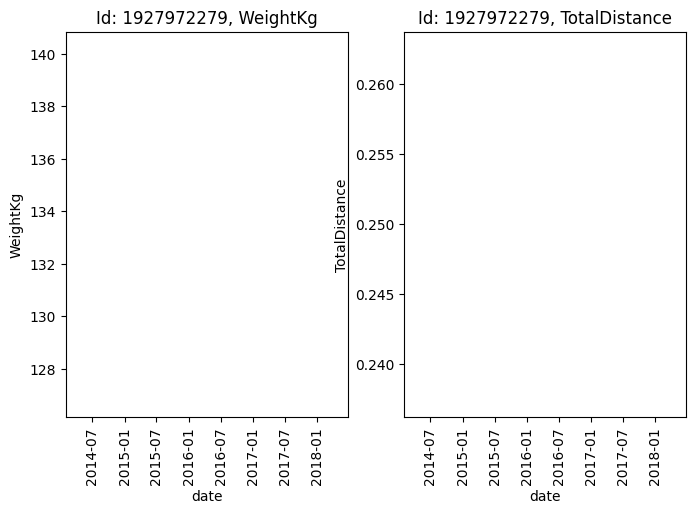

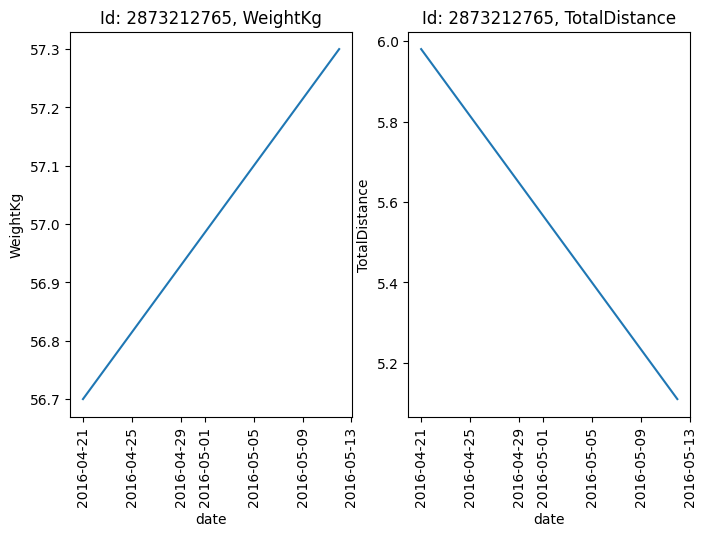

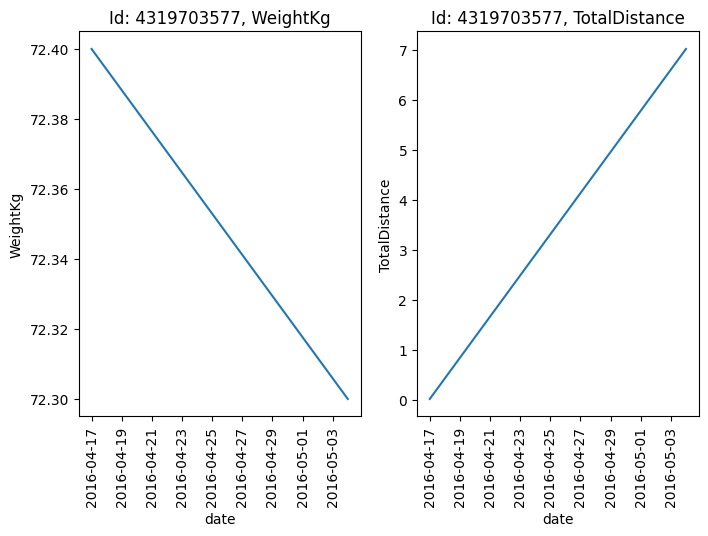

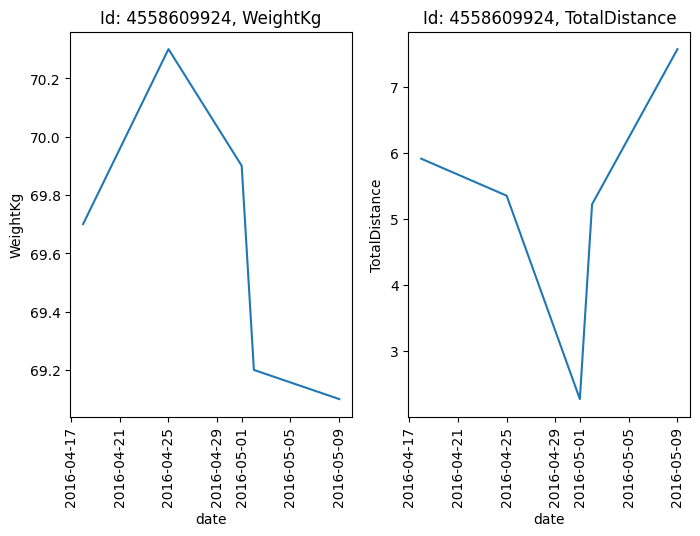

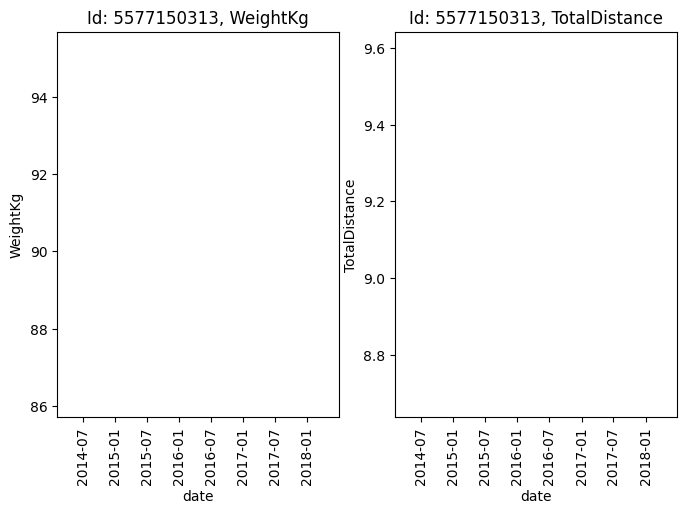

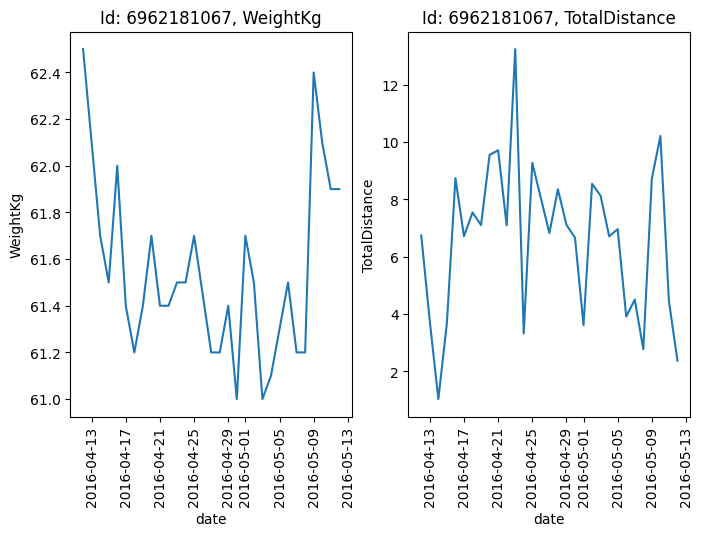

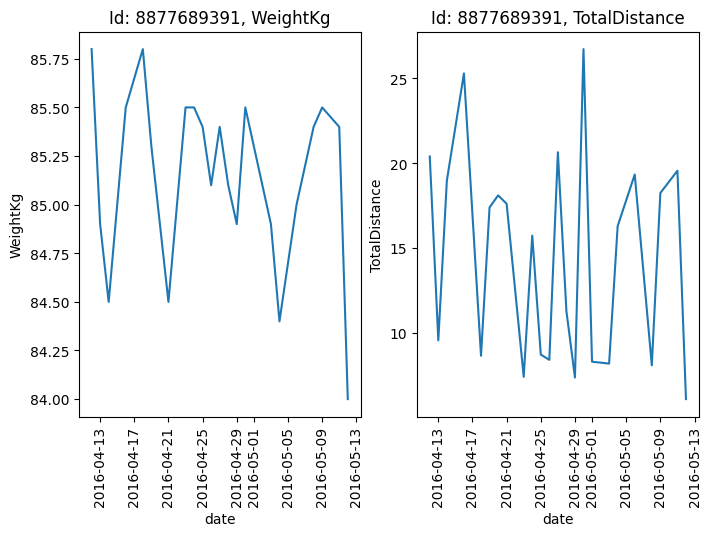

In [28]:
# 
for id in weight_df["Id"].unique():
    id_df = weight_df.loc[weight_df["Id"] == id]
    figure, axes = plt.subplots(1, 2, figsize=(8, 5))
    sns.lineplot(data=id_df, x="date", y="WeightKg", ax=axes[0])
    sns.lineplot(data=id_df, x="date", y="TotalDistance", ax=axes[1])
    axes[0].set_title(f"Id: {id}, WeightKg")
    axes[1].set_title(f"Id: {id}, TotalDistance")
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)
    plt.show()

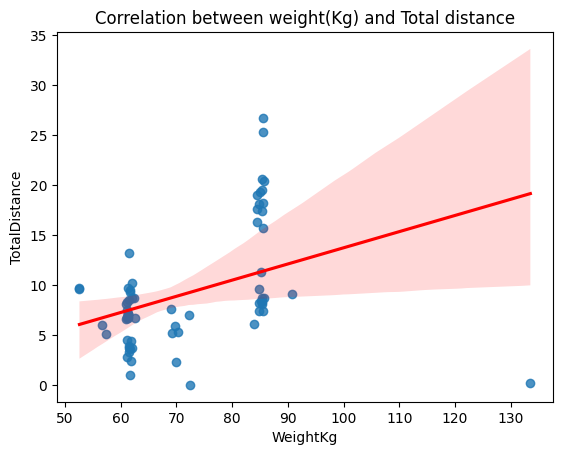

In [71]:
# ユーザーが歩いた距離と体重の相関を確認
sns.regplot(data=weight_df, x="WeightKg", y="TotalDistance", line_kws=dict(color="r"))
plt.title("Correlation between weight(Kg) and Total distance")
plt.savefig("./graph/correlation_between_weight_and_distance.jpg")
# plt.show()

In [49]:
corr_weight_distance = weight_df["WeightKg"].corr(weight_df["TotalDistance"])
print(f"体重と活動量の相関係数:{np.round(corr_weight_distance, 3)}")

体重と活動量の相関係数:0.385


## 歩いているのに体重は増えている。デバイスも適度な運動以上と認識していない

In [30]:
# 整形したデータフレームを保存
sleep_df.to_csv("sleep.csv", index=False)
weight_df.to_csv("weight.csv", index=False)

In [31]:
activity_count = len(activity["Id"].unique())
activity_count

33

In [32]:
sleep_count = len(sleep["Id"].unique())
sleep_count

24

In [33]:
weight_count = len(weight["Id"].unique())
weight_count

8

In [34]:
log = pd.DataFrame([activity_count, sleep_count, weight_count], columns=["users_by_feature"])
log

,users_by_feature
0,33
1,24
2,8


C:\Users\yuuki\AppData\Local\Temp\ipykernel_7460\3029110473.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log.index, y="users_by_feature", data=log, palette="Set1")


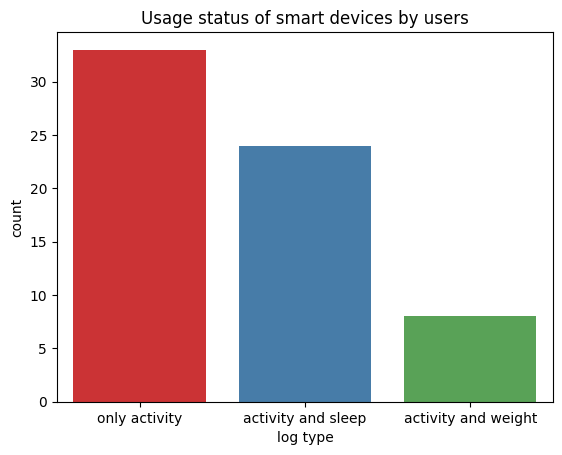

In [88]:
sns.barplot(x=log.index, y="users_by_feature", data=log, palette="Set1")
plt.xticks([0, 1, 2], ["only activity", "activity and sleep", "activity and weight"])
plt.ylabel("count")
plt.xlabel("log type")
plt.title("Usage status of smart devices by users")
plt.savefig("./graph/how_use_device.jpg")

In [36]:
activity_and_sleep_log = log.iloc[1, 0]/log.iloc[0, 0]
activity_and_sleep_log

0.7272727272727273

In [37]:
not_sleep_log = 1 - activity_and_sleep_log
not_sleep_log

0.2727272727272727

In [38]:
activity_and_weight_log = log.iloc[2, 0]/log.iloc[0, 0]
activity_and_weight_log

0.24242424242424243

In [39]:
not_weight_log = 1 - activity_and_weight_log
not_weight_log

0.7575757575757576

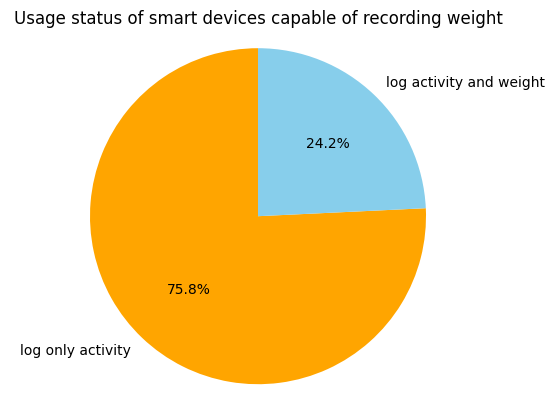

In [89]:
labels = ['log only activity', 'log activity and weight']
sizes = [not_weight_log, activity_and_weight_log]
colors = ["orange", "skyblue"]

# 円グラフの作成
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # アスペクト比を保持して円形にする
plt.title('Usage status of smart devices capable of recording weight')

# 描画
plt.savefig("graph/rate_usign_weight_feature.jpg")
# plt.show()

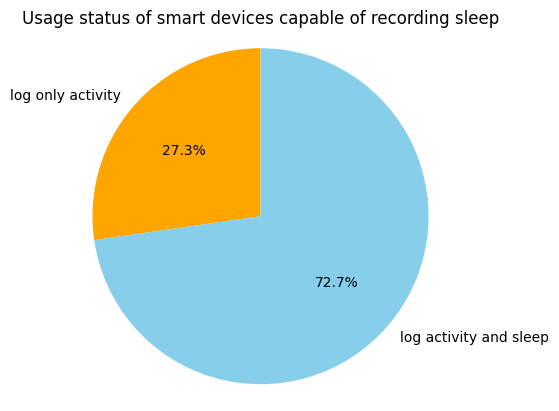

In [90]:
labels = ['log only activity', 'log activity and sleep']
sizes = [not_sleep_log, activity_and_sleep_log]
colors = ["orange", "skyblue"]

# 円グラフの作成
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # アスペクト比を保持して円形にする
plt.title('Usage status of smart devices capable of recording sleep')

# 描画
plt.savefig("graph/rate_usign_sleep_feature.jpg")
# plt.show()